In [1]:
# using warnings module to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Developed and Tested on Python=3.8.10
!pip install numpy==1.24.2
!pip install pandas==1.5.3
!pip install matplotlib==3.7.0
!pip install seaborn==0.12.2
!pip install scikit_learn==1.2.2
!pip install projectpro --upgrade

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import sys
from projectpro import checkpoint,data_pipeline, mo_distance, preserve, save_point, feedback, show_video
checkpoint('fcTel1')

<IPython.core.display.Javascript object>

In [3]:
# Set the locale to the user's default (e.g., 'en_US.UTF-8')
locale.setlocale(locale.LC_ALL, '')

'LC_CTYPE=en_US.UTF-8;LC_NUMERIC=lg_UG.UTF-8;LC_TIME=lg_UG.UTF-8;LC_COLLATE=en_US.UTF-8;LC_MONETARY=lg_UG.UTF-8;LC_MESSAGES=en_US.UTF-8;LC_PAPER=lg_UG.UTF-8;LC_NAME=lg_UG.UTF-8;LC_ADDRESS=lg_UG.UTF-8;LC_TELEPHONE=lg_UG.UTF-8;LC_MEASUREMENT=lg_UG.UTF-8;LC_IDENTIFICATION=lg_UG.UTF-8'

In [4]:
# These codes are useful when working with large datasets

# sets the maximum number of columns that will be displayed in a dataframe to 200 for improved data viewing
pd.set_option('display.max_columns', 200)
# sets the maximum number of columns that will be displayed in a dataframe to 300 for improved data viewing
pd.set_option('display.max_rows', 300)

In [5]:
# Sets numpy print options to display entire arrays regardless of size
np.set_printoptions(threshold=sys.maxsize)

# Set print options to suppress scientific notation
np.set_printoptions(suppress=True)

In [6]:
# data reading with csv
df = pd.read_csv('https://s3.amazonaws.com/projex.dezyre.com/telecom-data-analysis-project/materials/raw_telecom_data.csv')

## **Data Dictionary**

Exploratory Data Analysis (EDA) is a crucial step in any data-driven project, especially when working with datasets that are unfamiliar. In such cases, it is essential to understand the characteristics of the data, identify patterns and trends, and uncover insights that may be hidden in the data. Through EDA, we can discover the problems our customers face and the areas in which we can improve our services.

To conduct EDA, we need to have a clear understanding of the variables in our dataset, and that is where a data dictionary comes in handy.

| Column name	 | Description|
| ----- | ----- |
| Customer ID	 | Unique identifier for each customer |
| Month | Calendar Month- 1:12 | 
| Month of Joining |	Calender Month -1:14, Month for which the data is captured|
| zip_code |	Zip Code|
|Gender |	Gender|
| Age |	Age(Years)|
| Married |	Marital Status |
|Dependents | Dependents - Binary |
| Number of Dependents |	Number of Dependents|
|Location ID |	Location ID|
|Service ID	 |Service ID|
|state|	State|
|county	|County|
|timezone	|Timezone|
|area_codes|	Area Code|
|country	|Country|
|latitude|	Latitude|
|longitude	|Longitude|
|arpu|	Average revenue per user|
|roam_ic	|Roaming incoming calls in minutes|
|roam_og	|Roaming outgoing calls in minutes|
|loc_og_t2t|	Local outgoing calls within same network in minutes|
|loc_og_t2m	|Local outgoing calls outside network in minutes(outside same + partner network)|
|loc_og_t2f|	Local outgoing calls with Partner network in minutes|
|loc_og_t2c	|Local outgoing calls with Call Center in minutes|
|std_og_t2t|	STD outgoing calls within same network in minutes|
|std_og_t2m|	STD outgoing calls outside network in minutes(outside same + partner network)|
|std_og_t2f|	STD outgoing calls with Partner network in minutes|
|std_og_t2c	|STD outgoing calls with Call Center in minutes|
|isd_og|	ISD Outgoing calls|
|spl_og	|Special Outgoing calls|
|og_others|	Other Outgoing Calls|
|loc_ic_t2t|	Local incoming calls within same network in minutes|
|loc_ic_t2m|	Local incoming calls outside network in minutes(outside same + partner network)|
|loc_ic_t2f	|Local incoming calls with Partner network in minutes|
|std_ic_t2t	|STD incoming calls within same network in minutes|
|std_ic_t2m	|STD incoming calls outside network in minutes(outside same + partner network)|
|std_ic_t2f|	STD incoming calls with Partner network in minutes|
|std_ic_t2o|	STD incoming calls operators other networks in minutes|
|spl_ic|	Special Incoming calls in minutes|
|isd_ic|	ISD Incoming calls in minutes|
|ic_others|	Other Incoming Calls|
|total_rech_amt|	Total Recharge Amount in Local Currency|
|total_rech_data|	Total Recharge Amount for Data in Local Currency
|vol_4g|	4G Internet Used in GB|
|vol_5g|	5G Internet used in GB|
|arpu_5g|	Average revenue per user over 5G network|
|arpu_4g|	Average revenue per user over 4G network|
|night_pck_user|	Is Night Pack User(Specific Scheme)|
|fb_user|	Social Networking scheme|
|aug_vbc_5g|	Volume Based cost for 5G network (outside the scheme paid based on extra usage)|
|offer|	Offer Given to User|
|Referred a Friend|	Referred a Friend : Binary|
|Number of Referrals|	Number of Referrals|
|Phone Service|	Phone Service: Binary|
|Multiple Lines|	Multiple Lines for phone service: Binary|
|Internet Service|	Internet Service: Binary|
|Internet Type|	Internet Type|
|Streaming Data Consumption|	Streaming Data Consumption|
|Online Security|	Online Security|
|Online Backup|	Online Backup|
|Device Protection Plan|	Device Protection Plan|
|Premium Tech Support|	Premium Tech Support|
|Streaming TV|	Streaming TV|
|Streaming Movies|	Streaming Movies|
|Streaming Music|	Streaming Music|
|Unlimited Data|	Unlimited Data|
|Payment Method|	Payment Method|
|Status ID|	Status ID|
|Satisfaction Score|	Satisfaction Score|
|Churn Category|	Churn Category|
|Churn Reason|	Churn Reason|
|Customer Status|	Customer Status|
|Churn Value|	Binary Churn Value



### **Customer Call Usage Analysis**

In [7]:
# All columns
df.columns

Index(['Customer ID', 'Month of Joining', 'Month', 'zip_code', 'Gender', 'Age',
       'Married', 'Dependents', 'Number of Dependents', 'Location ID',
       'Service ID', 'state', 'county', 'timezone', 'area_codes', 'country',
       'latitude', 'longitude', 'arpu', 'roam_ic', 'roam_og', 'loc_og_t2t',
       'loc_og_t2m', 'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m',
       'std_og_t2f', 'std_og_t2c', 'isd_og', 'spl_og', 'og_others',
       'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m',
       'std_ic_t2f', 'std_ic_t2o', 'spl_ic', 'isd_ic', 'ic_others',
       'total_rech_amt', 'total_rech_data', 'vol_4g', 'vol_5g', 'arpu_5g',
       'arpu_4g', 'night_pck_user', 'fb_user', 'aug_vbc_5g', 'Churn Value',
       'Referred a Friend', 'Number of Referrals', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Streaming Data Consumption', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Suppo

In [8]:
# Setting customer id and month as index
df=df.set_index(['Customer ID','Month'])

In [9]:
# Selecting specific columns to check the customer call usage
df_call_usage=df[['Month of Joining','roam_ic', 'roam_og', 'loc_og_t2t',
       'loc_og_t2m', 'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m',
       'std_og_t2f', 'std_og_t2c', 'isd_og', 'spl_og', 'og_others',
       'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m',
       'std_ic_t2f', 'std_ic_t2o', 'spl_ic', 'isd_ic', 'ic_others',
       'total_rech_amt','Phone Service']]

In [10]:
df_call_usage.head()

Month of Joining  roam_ic  roam_og  loc_og_t2t  \
Customer ID    Month                                                   
hthjctifkiudi0 1                     1    18.88    78.59      280.32   
uqdtniwvxqzeu1 6                     6    69.46    72.08      255.73   
               7                     6  1012.60   115.26       52.95   
               8                     6    84.18    99.85      140.51   
               9                     6     0.00     0.00        0.00   

                      loc_og_t2m  loc_og_t2f  loc_og_t2c  std_og_t2t  \
Customer ID    Month                                                   
hthjctifkiudi0 1           30.97        5.71        1.79       25.71   
uqdtniwvxqzeu1 6          148.80       30.00        7.61      308.29   
               7             NaN      103.28       15.71      244.20   
               8         4006.99      280.86        6.33      346.14   
               9            0.00       45.00        0.00        0.00   

                      std_og_t2m  std_og_t2f  std_og_t2c  isd_og  spl_og  \
Customer ID    Month                                                       
hthjctifkiudi0 1          175.56        0.47         0.0    5.11    0.65   
uqdtniwvxqzeu1 6          265.20       10.82         0.0    1.23  905.51   
               7           15.19         NaN         NaN   13.14  455.15   
               8          103.15      183.53         0.0   33.88  495.60   
               9            0.00       45.00         0.0    0.00    0.00   

                       og_others  loc_ic_t2t  loc_ic_t2m  loc_ic_t2f  \
Customer ID    Month                                                   
hthjctifkiudi0 1           13.99      121.51      168.40       67.61   
uqdtniwvxqzeu1 6            1.69      212.93      155.19       29.04   
               7          115.63      121.80      699.39       44.49   
               8           14.01      658.96      195.02      144.11   
               9      8787978.00      138.85      201.92       19.89   

                      std_ic_t2t  std_ic_t2m  std_ic_t2f  std_ic_t2o  spl_ic  \
Customer ID    Month                                                           
hthjctifkiudi0 1          115.69       52.22       18.71         0.0    0.26   
uqdtniwvxqzeu1 6            9.15       38.89        0.84         0.0    0.05   
               7           83.59      914.70       13.25         0.0    0.06   
               8           50.18        2.35      623.94         0.0    0.07   
               9           15.91       23.78       16.01         0.0    0.03   

                      isd_ic  ic_others total_rech_amt Phone Service  
Customer ID    Month                                                  
hthjctifkiudi0 1       11.53      46.42             18           Yes  
uqdtniwvxqzeu1 6       32.51      25.53           1183           Yes  
               7       13.05       5.62            295           Yes  
               8       69.13      10.62            354           Yes  
               9       64.35      36.18              0            No

* Columns `Phone Service` and `total_rech_amt` do not have null values

In [11]:
# There are a lot of null values 
df_call_usage.describe()

Month of Joining       roam_ic       roam_og    loc_og_t2t  \
count     653753.000000  6.249240e+05  6.334710e+05  6.260620e+05   
mean           5.823574  3.695572e+04  3.629550e+04  3.545171e+04   
std            2.855148  5.633568e+05  5.579342e+05  5.472752e+05   
min            1.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%            3.000000  1.249000e+01  1.989000e+01  4.239000e+01   
50%            6.000000  4.929000e+01  7.475000e+01  1.670200e+02   
75%            8.000000  1.118400e+02  1.336800e+02  2.993900e+02   
max           12.000000  8.787978e+06  8.787978e+06  8.787978e+06   

         loc_og_t2m    loc_og_t2f    loc_og_t2c    std_og_t2t    std_og_t2m  \
count  6.257440e+05  5.864870e+05  6.305460e+05  6.165360e+05  6.077260e+05   
mean   3.659867e+04  3.730951e+04  3.423369e+04  3.562221e+04  3.644849e+04   
std    5.573928e+05  5.673674e+05  5.435927e+05  5.510383e+05  5.588584e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.428000e+01  1.540000e+00  2.110000e+00  4.159000e+01  3.027000e+01   
50%    1.319800e+02  7.230000e+00  8.440000e+00  1.662000e+02  1.251500e+02   
75%    4.701500e+02  1.290000e+01  1.478000e+01  2.999400e+02  2.272800e+02   
max    8.787978e+06  8.787978e+06  8.787978e+06  8.787978e+06  8.787978e+06   

         std_og_t2f    std_og_t2c        isd_og        spl_og     og_others  \
count  6.263330e+05  5.427680e+05  6.122130e+05  5.596970e+05  6.322620e+05   
mean   3.465084e+04  4.203332e+04  3.542208e+04  3.930345e+04  3.584864e+04   
std    5.468664e+05  6.024441e+05  5.526578e+05  5.822548e+05  5.557578e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.570000e+00  0.000000e+00  3.980000e+00  4.320000e+00  4.590000e+00   
50%    6.490000e+00  0.000000e+00  1.704000e+01  2.203000e+01  1.857000e+01   
75%    3.525000e+01  0.000000e+00  3.014000e+01  3.981000e+01  9.343000e+01   
max    8.787978e+06  8.787978e+06  8.787978e+06  8.787978e+06  8.787978e+06   

          loc_ic_t2t     loc_ic_t2m     loc_ic_t2f     std_ic_t2t  \
count  618673.000000  626915.000000  629922.000000  596420.000000   
mean      791.399134     672.287159     315.452390     314.727407   
std      1212.105552     994.667177     483.716646     611.683476   
min         0.000000       0.000000       0.000000       0.000000   
25%        80.970000      80.750000      34.890000      38.750000   
50%       162.470000     161.520000      69.495000      77.290000   
75%      1039.430000     866.780000     408.410000     115.550000   
max      4363.950000    3783.530000    1872.340000    2527.070000   

          std_ic_t2m     std_ic_t2f  std_ic_t2o         spl_ic         isd_ic  \
count  627547.000000  635174.000000    570165.0  620476.000000  570988.000000   
mean      290.950402     120.796443         0.0       0.233584     170.837105   
std       438.097905     185.391565         0.0       0.438172     384.665897   
min         0.000000       0.000000         0.0       0.000000       0.000000   
25%        30.900000      12.090000         0.0       0.040000      23.640000   
50%        62.110000      24.260000         0.0       0.080000      47.030000   
75%       380.180000     165.410000         0.0       0.140000      70.610000   
max      1619.680000     663.930000         0.0       2.330000    1624.530000   

           ic_others  
count  613198.000000  
mean      127.687898  
std       289.060700  
min         0.000000  
25%        19.100000  
50%        38.070000  
75%        57.190000  
max      1344.130000

In [12]:
# Let's check how many null values are present where calling plan is there
df_call_usage[df_call_usage['Phone Service']=='Yes'].isna().sum()

Month of Joining         0
roam_ic              28829
roam_og              20282
loc_og_t2t           27691
loc_og_t2m           28009
loc_og_t2f           67266
loc_og_t2c           23207
std_og_t2t           37217
std_og_t2m           46027
std_og_t2f           27420
std_og_t2c          110985
isd_og               41540
spl_og               94056
og_others            21491
loc_ic_t2t           28366
loc_ic_t2m           21701
loc_ic_t2f           19300
std_ic_t2t           46343
std_ic_t2m           21173
std_ic_t2f           14969
std_ic_t2o           67623
spl_ic               26873
isd_ic               66986
ic_others            32766
total_rech_amt           0
Phone Service            0
dtype: int64

In [13]:
# Lets check how many % values are missing when Phone Service is Yes
df_call_usage[df_call_usage['Phone Service']=='Yes'].isna().sum()/df_call_usage.shape[0]

Month of Joining    0.000000
roam_ic             0.044098
roam_og             0.031024
loc_og_t2t          0.042357
loc_og_t2m          0.042843
loc_og_t2f          0.102892
loc_og_t2c          0.035498
std_og_t2t          0.056928
std_og_t2m          0.070404
std_og_t2f          0.041942
std_og_t2c          0.169766
isd_og              0.063541
spl_og              0.143871
og_others           0.032873
loc_ic_t2t          0.043389
loc_ic_t2m          0.033194
loc_ic_t2f          0.029522
std_ic_t2t          0.070888
std_ic_t2m          0.032387
std_ic_t2f          0.022897
std_ic_t2o          0.103438
spl_ic              0.041106
isd_ic              0.102464
ic_others           0.050120
total_rech_amt      0.000000
Phone Service       0.000000
dtype: float64

In [14]:
#lets check how many null values are present where calling plan is not there
df_call_usage[df_call_usage['Phone Service']=='No'].isna().sum()

Month of Joining        0
roam_ic                 0
roam_og                 0
loc_og_t2t              0
loc_og_t2m              0
loc_og_t2f              0
loc_og_t2c              0
std_og_t2t              0
std_og_t2m              0
std_og_t2f              0
std_og_t2c              0
isd_og                  0
spl_og                  0
og_others               0
loc_ic_t2t           6714
loc_ic_t2m           5137
loc_ic_t2f           4531
std_ic_t2t          10990
std_ic_t2m           5033
std_ic_t2f           3610
std_ic_t2o          15965
spl_ic               6404
isd_ic              15779
ic_others            7789
total_rech_amt          0
Phone Service           0
dtype: int64

In [15]:
# Lets check how many % values are missing when Phone Service is No
df_call_usage[df_call_usage['Phone Service']=='No'].isna().sum()/df_call_usage.shape[0]

Month of Joining    0.000000
roam_ic             0.000000
roam_og             0.000000
loc_og_t2t          0.000000
loc_og_t2m          0.000000
loc_og_t2f          0.000000
loc_og_t2c          0.000000
std_og_t2t          0.000000
std_og_t2m          0.000000
std_og_t2f          0.000000
std_og_t2c          0.000000
isd_og              0.000000
spl_og              0.000000
og_others           0.000000
loc_ic_t2t          0.010270
loc_ic_t2m          0.007858
loc_ic_t2f          0.006931
std_ic_t2t          0.016811
std_ic_t2m          0.007699
std_ic_t2f          0.005522
std_ic_t2o          0.024421
spl_ic              0.009796
isd_ic              0.024136
ic_others           0.011914
total_rech_amt      0.000000
Phone Service       0.000000
dtype: float64

In [16]:
df_call_usage.dtypes

Month of Joining      int64
roam_ic             float64
roam_og             float64
loc_og_t2t          float64
loc_og_t2m          float64
loc_og_t2f          float64
loc_og_t2c          float64
std_og_t2t          float64
std_og_t2m          float64
std_og_t2f          float64
std_og_t2c          float64
isd_og              float64
spl_og              float64
og_others           float64
loc_ic_t2t          float64
loc_ic_t2m          float64
loc_ic_t2f          float64
std_ic_t2t          float64
std_ic_t2m          float64
std_ic_t2f          float64
std_ic_t2o          float64
spl_ic              float64
isd_ic              float64
ic_others           float64
total_rech_amt       object
Phone Service        object
dtype: object

According to the data dictionary, `total_rech_amt` ought to be a float. However, it is an object.

In [17]:
# Counts of unique values in total rech amount
df_call_usage['total_rech_amt'].value_counts()

0        106254
989        7432
98769      6245
e01        2507
0.1        2485
          ...  
8047          1
4616          1
7822          1
7747          1
8120          1
Name: total_rech_amt, Length: 11899, dtype: int64

In [18]:
# Convert e01 to 10 (e01 = 1*10^1)
df_call_usage.loc[df['total_rech_amt']=='e01','total_rech_amt']=10

Let's now change the column to a numeric datatype.

In [19]:
# Changing the column back to numeric data type
df_call_usage['total_rech_amt']=pd.to_numeric(df_call_usage['total_rech_amt'])

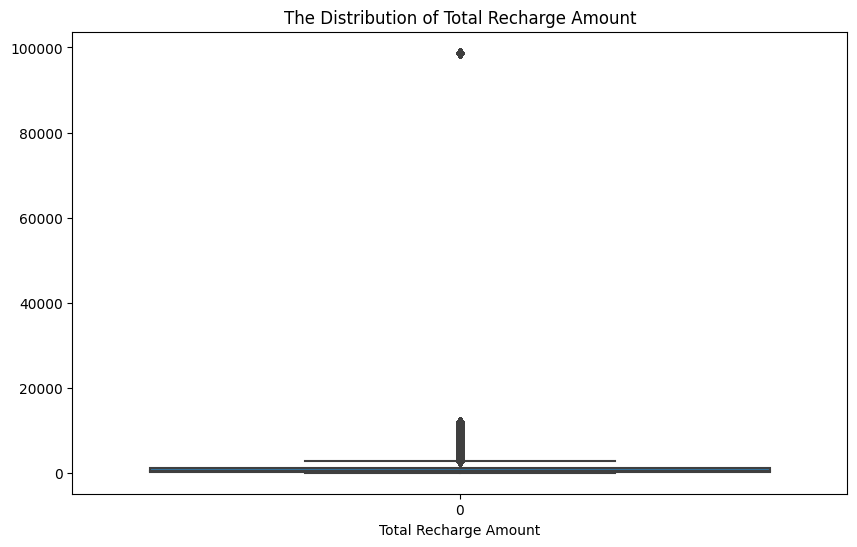

In [20]:
# Plot the the distribution using Box plot
plt.figure(figsize=(10,6))
sns.boxplot(df_call_usage['total_rech_amt'])
plt.title("The Distribution of Total Recharge Amount")
plt.xlabel("Total Recharge Amount")
plt.show()

In [21]:
# Check the quantiles
df_call_usage['total_rech_amt'].quantile([0.1, 0.5,0.75 ,0.9,0.97,0.99,0.999])

0.100        0.0
0.500      400.0
0.750     1158.0
0.900     7377.0
0.970    10939.0
0.990    11875.0
0.999    98769.0
Name: total_rech_amt, dtype: float64

In [22]:
# Filter the dataframe
df_call_usage[df_call_usage['total_rech_amt']>11875.0]['total_rech_amt'].value_counts()

98769.0    6245
11888.0      18
11899.0      17
11884.0      17
11892.0      16
11882.0      16
11889.0      14
11876.0      13
11883.0      12
11898.0      12
11895.0      12
11885.0      11
11881.0      11
11893.0      11
11878.0      11
11879.0      11
11880.0      10
11887.0      10
11896.0      10
11877.0       9
11890.0       8
11891.0       8
11886.0       7
11894.0       7
11897.0       6
11900.0       6
Name: total_rech_amt, dtype: int64

In [23]:
# Check the value counts where phone service is no
df_call_usage[df_call_usage['Phone Service']=='No']['total_rech_amt'].value_counts()

0.0        105992
989.0        7341
98769.0      6245
10.0         2507
0.1          2485
Name: total_rech_amt, dtype: int64

In [24]:
# Filter the customers who have phone service and outlier values as well
df_call_usage[(df_call_usage['Phone Service']=='Yes')&(df_call_usage['total_rech_amt'].isin([0.1,98769]))]

Empty DataFrame
Columns: [Month of Joining, roam_ic, roam_og, loc_og_t2t, loc_og_t2m, loc_og_t2f, loc_og_t2c, std_og_t2t, std_og_t2m, std_og_t2f, std_og_t2c, isd_og, spl_og, og_others, loc_ic_t2t, loc_ic_t2m, loc_ic_t2f, std_ic_t2t, std_ic_t2m, std_ic_t2f, std_ic_t2o, spl_ic, isd_ic, ic_others, total_rech_amt, Phone Service]
Index: []

**Observation:**
* total_rech_amt(s) 98769 and 0.1 look like outliers. A spend of these amounts looks very unlikely.
* There are no customers that have a Phone Service and have the above amounts as total_rech_amt. It looks like they are incorrect values
* If we are to replace them, let's replace them with 0

In [25]:
# Replace values with 0
df_call_usage['total_rech_amt']=df_call_usage['total_rech_amt'].replace([0.1,98769],0)

In [26]:
# Check the counts again for phone service = no
df_call_usage[df_call_usage['Phone Service']=='No']['total_rech_amt'].value_counts()

0.0      114722
989.0      7341
10.0       2507
Name: total_rech_amt, dtype: int64

<IPython.core.display.Javascript object>

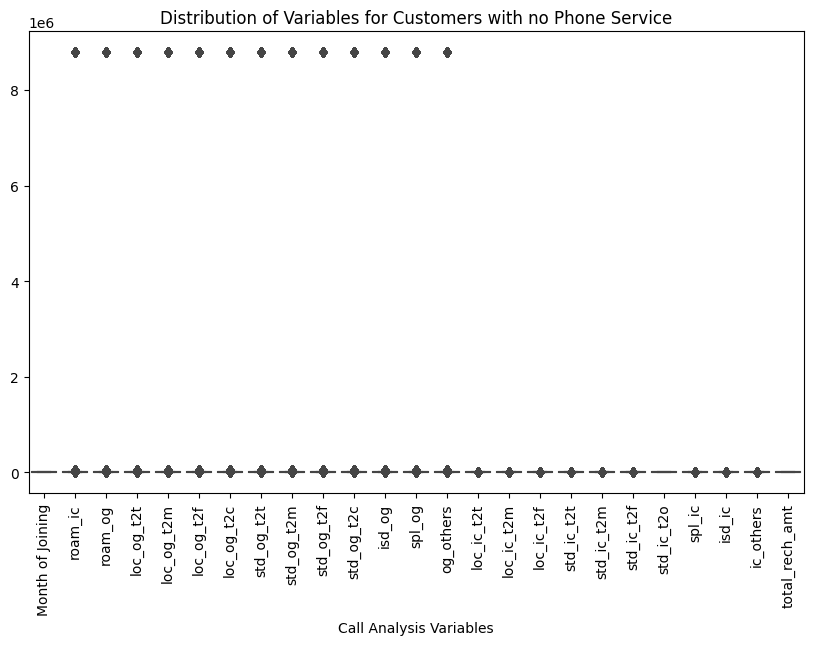

In [27]:
# Plot a boxplot for such values
preserve("fcTel1")
plt.figure(figsize=(10,6))
sns.boxplot(df_call_usage[(df_call_usage['Phone Service']=='No')&(df_call_usage['total_rech_amt'].isin([989,10]))])
plt.title("Distribution of Variables for Customers with no Phone Service")
plt.xlabel("Call Analysis Variables")
plt.xticks(rotation=90)
plt.show()

Take note that almost all of the columns have a value close to 0 or 8*E6 (8x10^6).

Let's look at the quantiles for all of the outgoing call utilisation columns.

In [28]:
# Specifying the calling columns
outgoing_call_col=['roam_og', 'loc_og_t2t','loc_og_t2m', 'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m',
                    'std_og_t2f', 'std_og_t2c', 'isd_og', 'spl_og', 'og_others']

#### **Data Dictionary**

| Column name	 | Description|
| ----- | ----- |
|roam_og	|Roaming outgoing calls in minutes|
|loc_og_t2t|	Local outgoing calls within same network in minutes|
|loc_og_t2m	|Local outgoing calls outside network in minutes(outside same + partner network)|
|loc_og_t2f|	Local outgoing calls with Partner network in minutes|
|loc_og_t2c	|Local outgoing calls with Call Center in minutes|
|std_og_t2t|	STD outgoing calls within same network in minutes|
|std_og_t2m|	STD outgoing calls outside network in minutes(outside same + partner network)|
|std_og_t2f|	STD outgoing calls with Partner network in minutes|
|std_og_t2c	|STD outgoing calls with Call Center in minutes|
|isd_og|	ISD Outgoing calls|
|spl_og	|Special Outgoing calls|
|og_others|	Other Outgoing Calls|


In [29]:
# Call Usage for customers with no phone service and high recharge amount
df_call_usage[(df_call_usage['Phone Service']=='No')&(df_call_usage['total_rech_amt'].isin([989,10]))][outgoing_call_col].apply(lambda col: col.unique())

roam_og  loc_og_t2t  loc_og_t2m  loc_og_t2f  loc_og_t2c  std_og_t2t  \
0        0.0         0.0        45.0         0.0         0.0         0.0   
1       45.0     46254.0         0.0     46254.0        45.0     46254.0   
2    46254.0        45.0        68.0        45.0        68.0        68.0   
3  8787978.0   8787978.0   8787978.0   8787978.0   8787978.0        45.0   
4       68.0        68.0     46254.0        68.0     46254.0   8787978.0   

   std_og_t2m  std_og_t2f  std_og_t2c     isd_og     spl_og  og_others  
0         0.0         0.0        45.0        0.0        0.0        0.0  
1        45.0     46254.0         0.0       45.0       45.0       45.0  
2     46254.0        68.0     46254.0    46254.0    46254.0    46254.0  
3        68.0        45.0   8787978.0       68.0  8787978.0  8787978.0  
4   8787978.0   8787978.0        68.0  8787978.0       68.0       68.0

In [32]:
# Call Usage for customers with no phone service and high recharge amount
df_call_usage[(df_call_usage['Phone Service']=='No')][outgoing_call_col].apply(lambda col: col.unique())

roam_og  loc_og_t2t  loc_og_t2m  loc_og_t2f  loc_og_t2c  std_og_t2t  \
0        0.0         0.0         0.0        45.0         0.0         0.0   
1       45.0        45.0        45.0         0.0        45.0     46254.0   
2    46254.0   8787978.0        68.0     46254.0     46254.0        45.0   
3       68.0     46254.0     46254.0        68.0        68.0   8787978.0   
4  8787978.0        68.0   8787978.0   8787978.0   8787978.0        68.0   

   std_og_t2m  std_og_t2f  std_og_t2c     isd_og     spl_og  og_others  
0         0.0        45.0         0.0        0.0        0.0  8787978.0  
1     46254.0         0.0        45.0       68.0       45.0        0.0  
2        45.0     46254.0   8787978.0       45.0    46254.0       45.0  
3   8787978.0        68.0     46254.0  8787978.0       68.0    46254.0  
4        68.0   8787978.0        68.0    46254.0  8787978.0       68.0

A breakdown of the code ran above

`filtered_data = df_call_usage[(df_call_usage['Phone Service'] == 'No') & (df_call_usage['total_rech_amt'].isin([989, 10]))]`

`unique_values = filtered_data[outgoing_call_col].apply(lambda col: col.unique())`

print(unique_values)

**Observation:**

* These values seem to have some relation with the recharge amount. 

* With the Phone service set to No, how can there be such values of outgoing call minutes? These values seem unlikely to be actual data and are likely due to data entry errors.

* In a real-life scenario, it would be advisable to investigate these values with the business to ensure accuracy. 

* However, for the purpose of this analysis, we can assume that these values are erroneous and proceed to replace all corresponding recharge amounts with 0.


Before we replace the values, let's see if this recharge amount exists when Phone Service is selected.

In [34]:
# Call Usage for customers with no phone service and high recharge amount
df_call_usage[(df_call_usage['Phone Service']=='Yes')&(df_call_usage['total_rech_amt'].isin([989,10]))][outgoing_call_col].apply(lambda col: col.unique())

roam_og       [131.92, 34.91, 65.91, 61.74, 3.69, nan, 139.0...
loc_og_t2t    [100.35, 144.73, 60.84, nan, 234.75, 57.35, 52...
loc_og_t2m    [1355.92, 3167.87, 270.26, 3512.23, 71.46, 61....
loc_og_t2f    [8.15, 0.72, 10.16, nan, 2.26, 13.64, 0.33, 77...
loc_og_t2c    [13.5, 325.41, 16.62, 12.76, 0.3, 4.61, nan, 3...
std_og_t2t    [29.54, 312.9, 228.12, 211.1, 252.63, 225.63, ...
std_og_t2m    [47.0, 1082.27, 149.87, 171.0, 94.8, 173.31, 9...
std_og_t2f    [184.62, 132.53, 6.51, 177.56, 4.57, 2.0, 3.09...
std_og_t2c                                           [0.0, nan]
isd_og        [204.02, 10.8, 34.19, 34.4, 21.35, 30.14, 25.2...
spl_og        [49.15, 17.51, 37.61, nan, 30.77, 39.55, 48.51...
og_others     [14.94, 15.77, 13.05, nan, 25.27, 7.16, 19.52,...
dtype: object

**Observation:**

* The list of unique values looks more diverse, in comparison to that with no Phone Service

In [33]:
# Filter the values where phone service is yes and recharge amt is in 10 or 989
df_call_usage[(df_call_usage['Phone Service']=='Yes')&(df_call_usage['total_rech_amt'].isin([10,989]))]

Month of Joining  roam_ic  roam_og  loc_og_t2t  \
Customer ID         Month                                                   
mvawicevzubbt203    14                    9    63.95   131.92      100.35   
jqlowmgrrbnsf859    7                     3   431.10    34.91      144.73   
antivlmeqegyi1478   2                     1  1585.09    65.91       60.84   
prbkyrzfijozx1616   8                     6  1071.48    61.74         NaN   
nhefrsuouiapc1633   11                    6     2.71     3.69      234.75   
...                                     ...      ...      ...         ...   
fnatcpehazawh161796 9                     9    80.14   156.87      293.52   
zcojuhfysudap162360 14                    5    44.33    16.68       44.36   
mbpogbzlhgsal162572 13                   10   159.38    16.79       51.13   
mrdmgqipiuhvf162579 13                    6   647.53   108.95      140.73   
qauaoorftepng162771 9                     6    73.20   104.51      260.77   

                           loc_og_t2m  loc_og_t2f  loc_og_t2c  std_og_t2t  \
Customer ID         Month                                                   
mvawicevzubbt203    14        1355.92        8.15       13.50       29.54   
jqlowmgrrbnsf859    7         3167.87        0.72      325.41      312.90   
antivlmeqegyi1478   2          270.26       10.16       16.62      228.12   
prbkyrzfijozx1616   8         3512.23         NaN       12.76      211.10   
nhefrsuouiapc1633   11          71.46        2.26        0.30      252.63   
...                               ...         ...         ...         ...   
fnatcpehazawh161796 9          412.47       12.84       16.61      233.59   
zcojuhfysudap162360 14        4144.96       12.21       10.81       60.61   
mbpogbzlhgsal162572 13          76.03        3.89        4.66      127.76   
mrdmgqipiuhvf162579 13          82.53        5.02       13.80      667.93   
qauaoorftepng162771 9           98.41        7.78       11.37      171.15   

                           std_og_t2m  std_og_t2f  std_og_t2c  isd_og  spl_og  \
Customer ID         Month                                                       
mvawicevzubbt203    14          47.00      184.62         0.0  204.02   49.15   
jqlowmgrrbnsf859    7         1082.27      132.53         0.0   10.80   17.51   
antivlmeqegyi1478   2          149.87        6.51         0.0   34.19   37.61   
prbkyrzfijozx1616   8          171.00      177.56         NaN   34.40     NaN   
nhefrsuouiapc1633   11          94.80        4.57         0.0   21.35   30.77   
...                               ...         ...         ...     ...     ...   
fnatcpehazawh161796 9          138.33        7.28         0.0   22.02   49.50   
zcojuhfysudap162360 14          47.62         NaN         0.0   19.08   12.72   
mbpogbzlhgsal162572 13         256.89        2.36         0.0   36.19    8.37   
mrdmgqipiuhvf162579 13         144.62        0.91         0.0   36.75   40.88   
qauaoorftepng162771 9          167.13        4.30         0.0   24.64   34.99   

                           og_others  loc_ic_t2t  loc_ic_t2m  loc_ic_t2f  \
Customer ID         Month                                                  
mvawicevzubbt203    14         14.94      210.85      213.56       84.03   
jqlowmgrrbnsf859    7          15.77     1206.69     1360.59     1263.17   
antivlmeqegyi1478   2          13.05       77.09      234.24       36.31   
prbkyrzfijozx1616   8            NaN      116.68      258.67       21.65   
nhefrsuouiapc1633   11         25.27      195.37      302.69     1103.31   
...                              ...         ...         ...         ...   
fnatcpehazawh161796 9           8.41      168.15      167.59       49.46   
zcojuhfysudap162360 14         16.53       10.18      105.64       32.76   
mbpogbzlhgsal162572 13         28.19         NaN       97.75       72.04   
mrdmgqipiuhvf162579 13         16.69      190.41       81.41       64.23   
qauaoorftepng162771 9          22.16      106.52       65

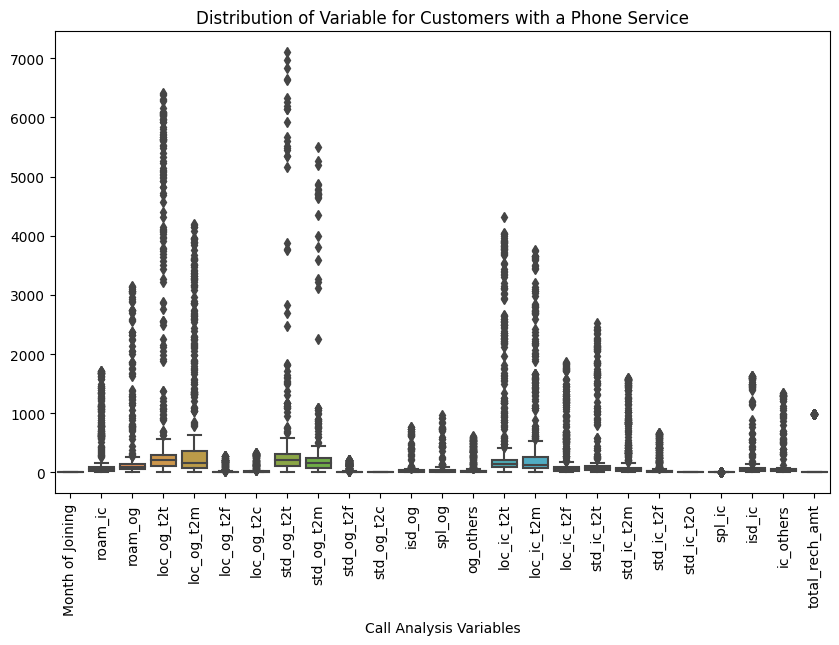

In [35]:
# Plot a boxplot for such values
plt.figure(figsize=(10,6))
sns.boxplot(df_call_usage[(df_call_usage['Phone Service']=='Yes')&(df_call_usage['total_rech_amt'].isin([10,989]))])
plt.title("Distribution of Variable for Customers with a Phone Service")
plt.xlabel("Call Analysis Variables")
plt.xticks(rotation=90)
plt.show()

In [46]:
type(df_call_usage[df_call_usage['Phone Service']=='No']['total_rech_amt'])

pandas.core.series.Series